# 케라스 서브클래싱 API

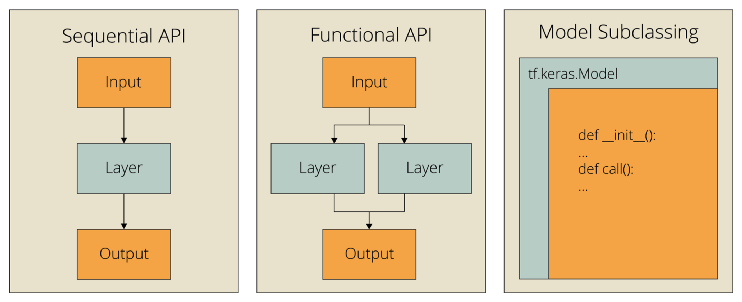

## 1. 서브클래식 API로 구현한 선형 회귀

In [1]:
import tensorflow as tf

class LinearRegression(tf.keras.Model):
  def __init__(self):
    super(LinearRegression, self).__init__()
    self.linear_layer = tf.keras.layers.Dense(1, input_dim=1, activation='linear')

  def call(self, x):
    y_pred = self.linear_layer(x)

    return y_pred

In [2]:
model = LinearRegression()

In [3]:
X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [4]:
sgd = tf.keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(X, y, epochs=300)

Epoch 1/300


ValueError: in user code:

    File "/opt/homebrew/anaconda3/envs/nlp/lib/python3.10/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/opt/homebrew/anaconda3/envs/nlp/lib/python3.10/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/homebrew/anaconda3/envs/nlp/lib/python3.10/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/opt/homebrew/anaconda3/envs/nlp/lib/python3.10/site-packages/keras/src/engine/training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "/opt/homebrew/anaconda3/envs/nlp/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/var/folders/87/xxwktcx901s56z5ds_qqnktw0000gn/T/__autograph_generated_filetahq8mjo.py", line 10, in tf__call
        y_pred = ag__.converted_call(ag__.ld(self).linear_layer, (ag__.ld(x),), None, fscope)

    ValueError: Exception encountered when calling layer 'linear_regression' (type LinearRegression).
    
    in user code:
    
        File "/var/folders/87/xxwktcx901s56z5ds_qqnktw0000gn/T/ipykernel_17630/238092129.py", line 9, in call  *
            y_pred = self.linear_layer(x)
        File "/opt/homebrew/anaconda3/envs/nlp/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler  **
            raise e.with_traceback(filtered_tb) from None
        File "/opt/homebrew/anaconda3/envs/nlp/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
            raise ValueError(
    
        ValueError: Input 0 of layer "dense" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    
    Call arguments received by layer 'linear_regression' (type LinearRegression):
      • x=tf.Tensor(shape=(None,), dtype=int64)


## 2. 세 가지 구현 방식 비교
### 1. Sequential API
- 장점 : 단순하게 층을 쌓는 방식으로 쉽고 사용하기가 간단합니다.
- 단점 : 다수의 입력(multi-input), 다수의 출력(multi-output)을 가진 모델 또는 층 간의 연결(concatenate)이나 덧셈(Add)과 같은 연산을 하는 모델을 구현하기에는 적합하지 않습니다. 이런 모델들의 구현은 Functional API를 사용해야 합니다.

### 2. Functional API
- 장점 : Sequential API로는 구현하기 어려운 복잡한 모델들을 구현할 수 있습니다.
- 단점 : 입력의 크기(shape)를 명시한 입력층(Input layer)을 모델의 앞단에 정의해주어야 합니다.

### 3. Subclassing API
- 장점 : Functional API로도 구현할 수 없는 모델들조차 구현이 가능합니다.
- 단점 : 객체 지향 프로그래밍(Object-oriented programming)에 익숙해야 하므로 코드 사용이 가장 까다롭습니다.